# **<span style="color:#0047AB; font-family: Arial, sans-serif;">OASIS INFOBYTE DATASCIENCE INTERN</span>**

## **<span style="color:#FF0000; font-family: Arial, sans-serif;">Task-3: CARS PRICE PREDICTION</span>**

### **Name:** Miraj Deep Bhandari


![sales.png](https://img.freepik.com/free-vector/car-showroom-center-with-autos-exhibition-inside-automobile-dealership-store-shop-interior-new-modern-vehicles-models-demonstration-sale-trading_575670-1511.jpg)


## <span style="color:#FF5733;">Importing the Dependencies</span>

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import statsmodels.api as sm

from sklearn.metrics import r2_score

## <span style="color:#FF5733;">Reading the CSV File</span>

In [2]:
data = pd.read_csv("CarPrice_Assignment.csv")

In [3]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## <span style="color:#FF5733;">Inspecting the Data Types of the Features</span>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

 ## <span style="color:#FF5733;">Inspecting  descriptive statistics of Numerical Columns</span>


In [5]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
data = data.drop("car_ID",axis=1)

## <span style="color:#FF5733;">Checking for Null Values and Duplicate Data</span>

In [7]:
data.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
data.duplicated().sum()

0

## <span style="color:#FF5733;">Extracting the Companies Name</span>


In [9]:
data['CarName'] = data['CarName'].str.split(' ',expand=True)[0]

data["CarName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

## <span style="color:#FF5733;">Correction on the name of Car Companies</span>

In [10]:
'''
maxda = mazda
Nissan = nissan
porsche = porcshce
toyota = toyouta
vokswagen = volkswagen = vw

'''
data['CarName'] = data['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})
data['symboling'] = data['symboling'].astype(object)


## <span style="color:#FF5733;">Extracting the Catagorical and Numerical Columns</span>

In [11]:
cat_col = data.select_dtypes(include=['object']).columns
num_col = data.select_dtypes(exclude=['object']).columns
data[cat_col]=data[cat_col].astype(str)
df_cat = data[cat_col]
df_num = data[num_col] 

## <span style="color:#FF5733;">Exploratory Data Analysis (EDA)</span>

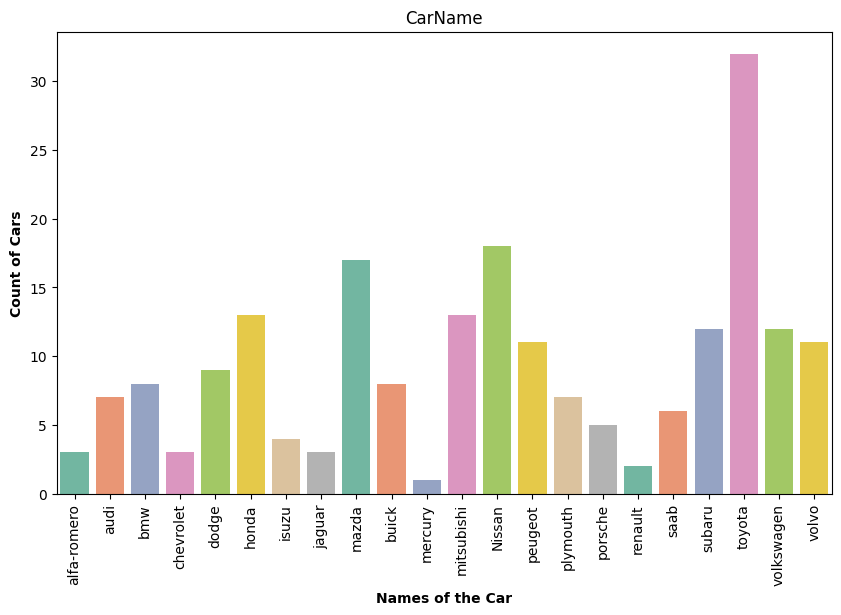

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='CarName', palette='Set2')
plt.title('CarName')
plt.xlabel('Names of the Car', fontweight='bold')
plt.ylabel('Count of Cars', fontweight='bold')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


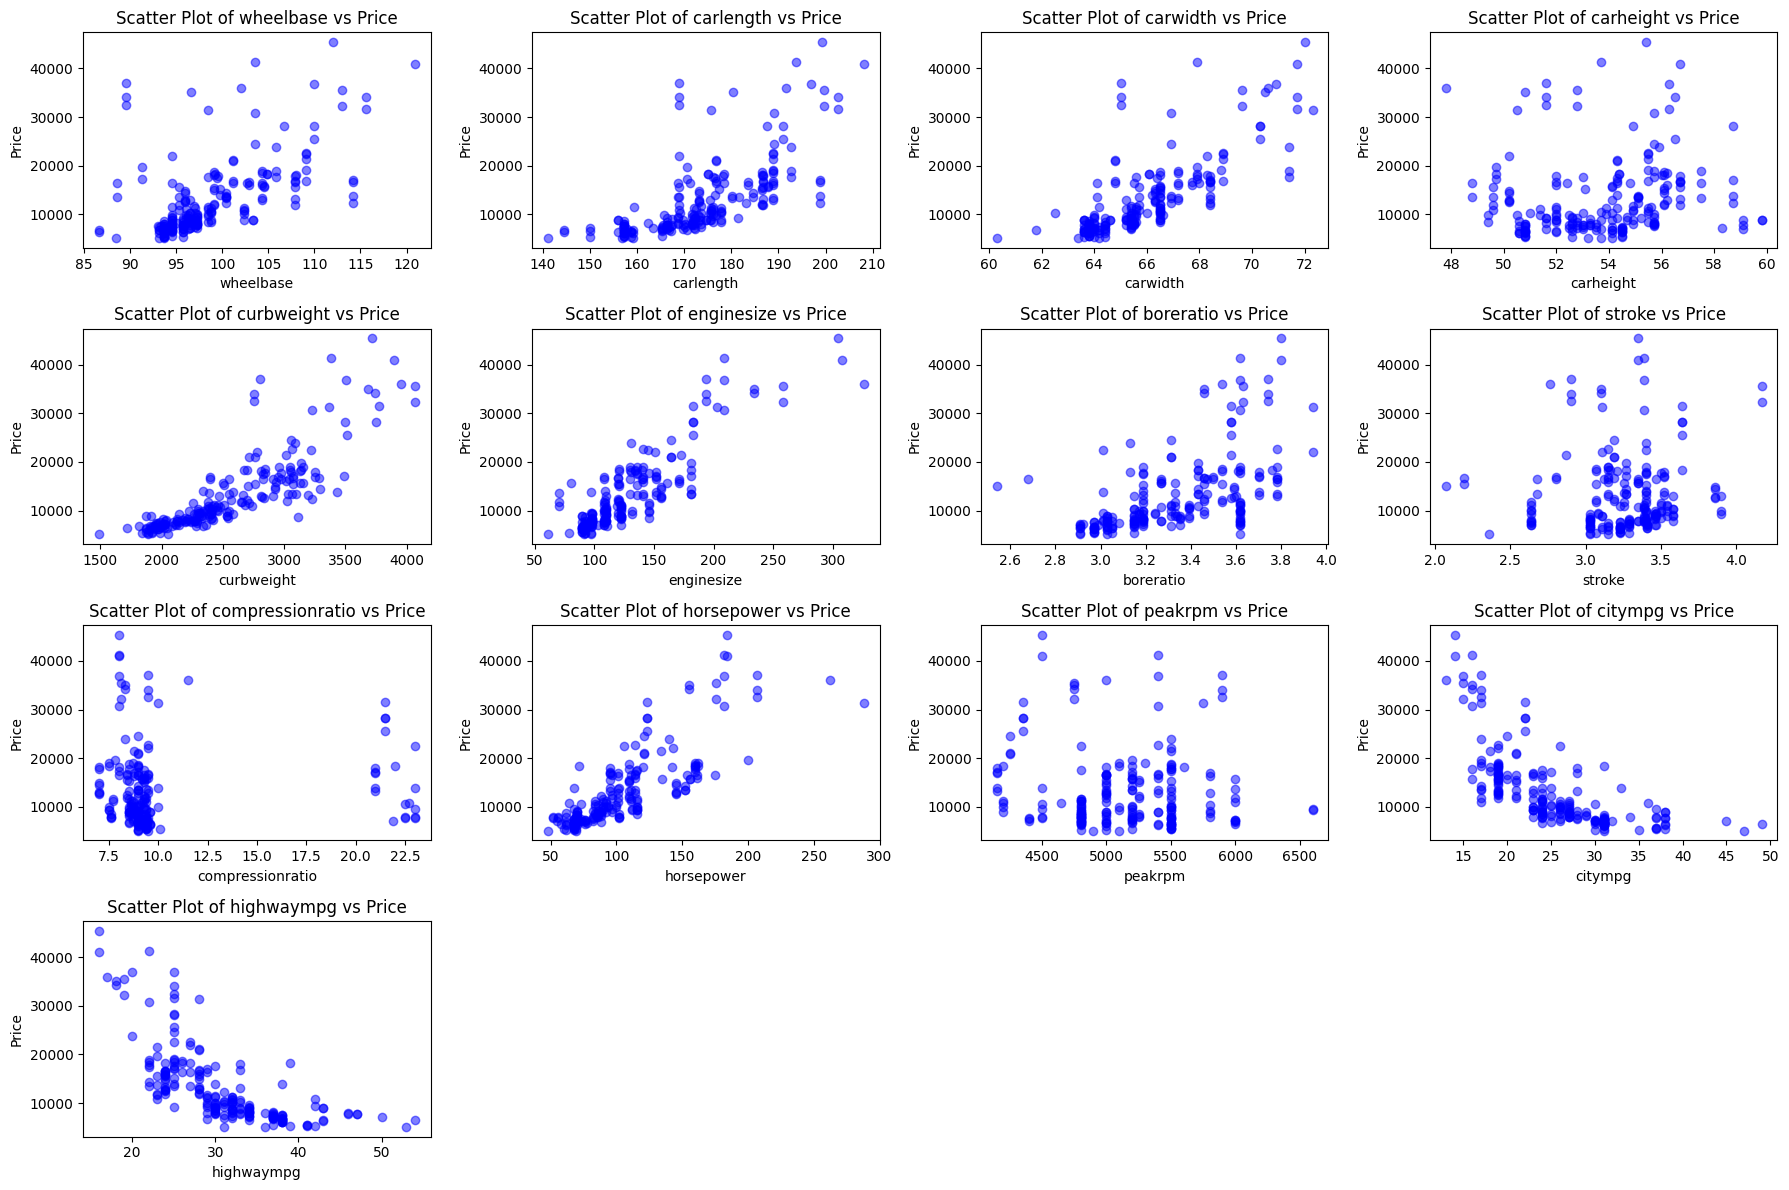

In [13]:

# Select the numerical features you want to visualize
features = df_num.columns[:-1]

# Create a grid of subplots with 4 rows and 4 columns
fig, axes = plt.subplots(4, 4, figsize=(18, 12))

# Flatten the axes for easy iteration
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]
    ax.scatter(data[feature], data['price'], alpha=0.5, color='b')
    ax.set_xlabel(feature)
    ax.set_ylabel('Price')
    ax.set_title(f'Scatter Plot of {feature} vs Price')
    

for i in range(13, 16):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


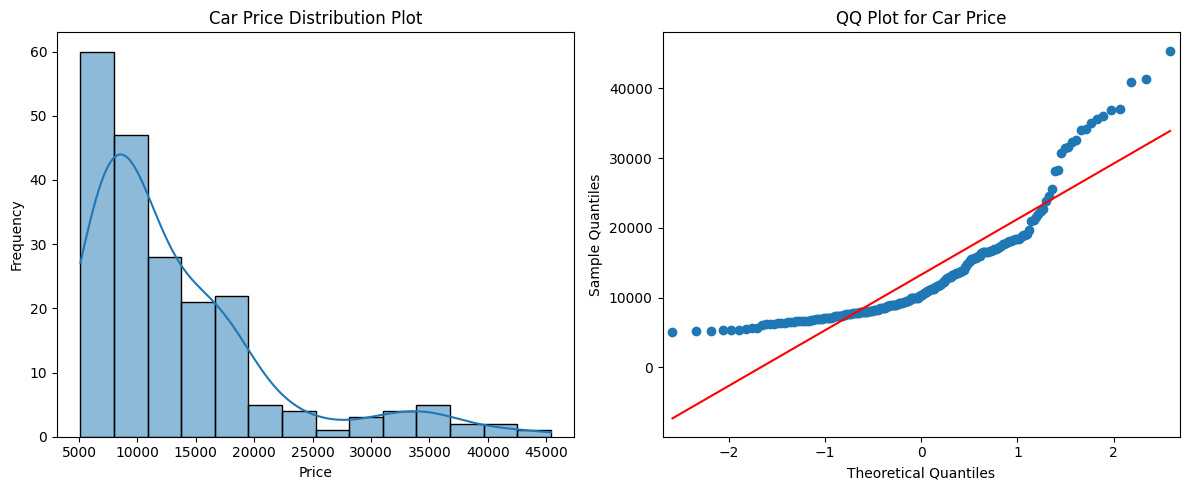

In [14]:
price_data = data["price"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# KDE plot
sns.histplot(price_data, kde=True, ax=axes[0])
axes[0].set_title('Car Price Distribution Plot')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

# QQ plot
sm.qqplot(price_data, line='s', ax=axes[1])
axes[1].set_title('QQ Plot for Car Price')
axes[1].set_xlabel('Theoretical Quantiles')
axes[1].set_ylabel('Sample Quantiles')

plt.tight_layout()
plt.show()


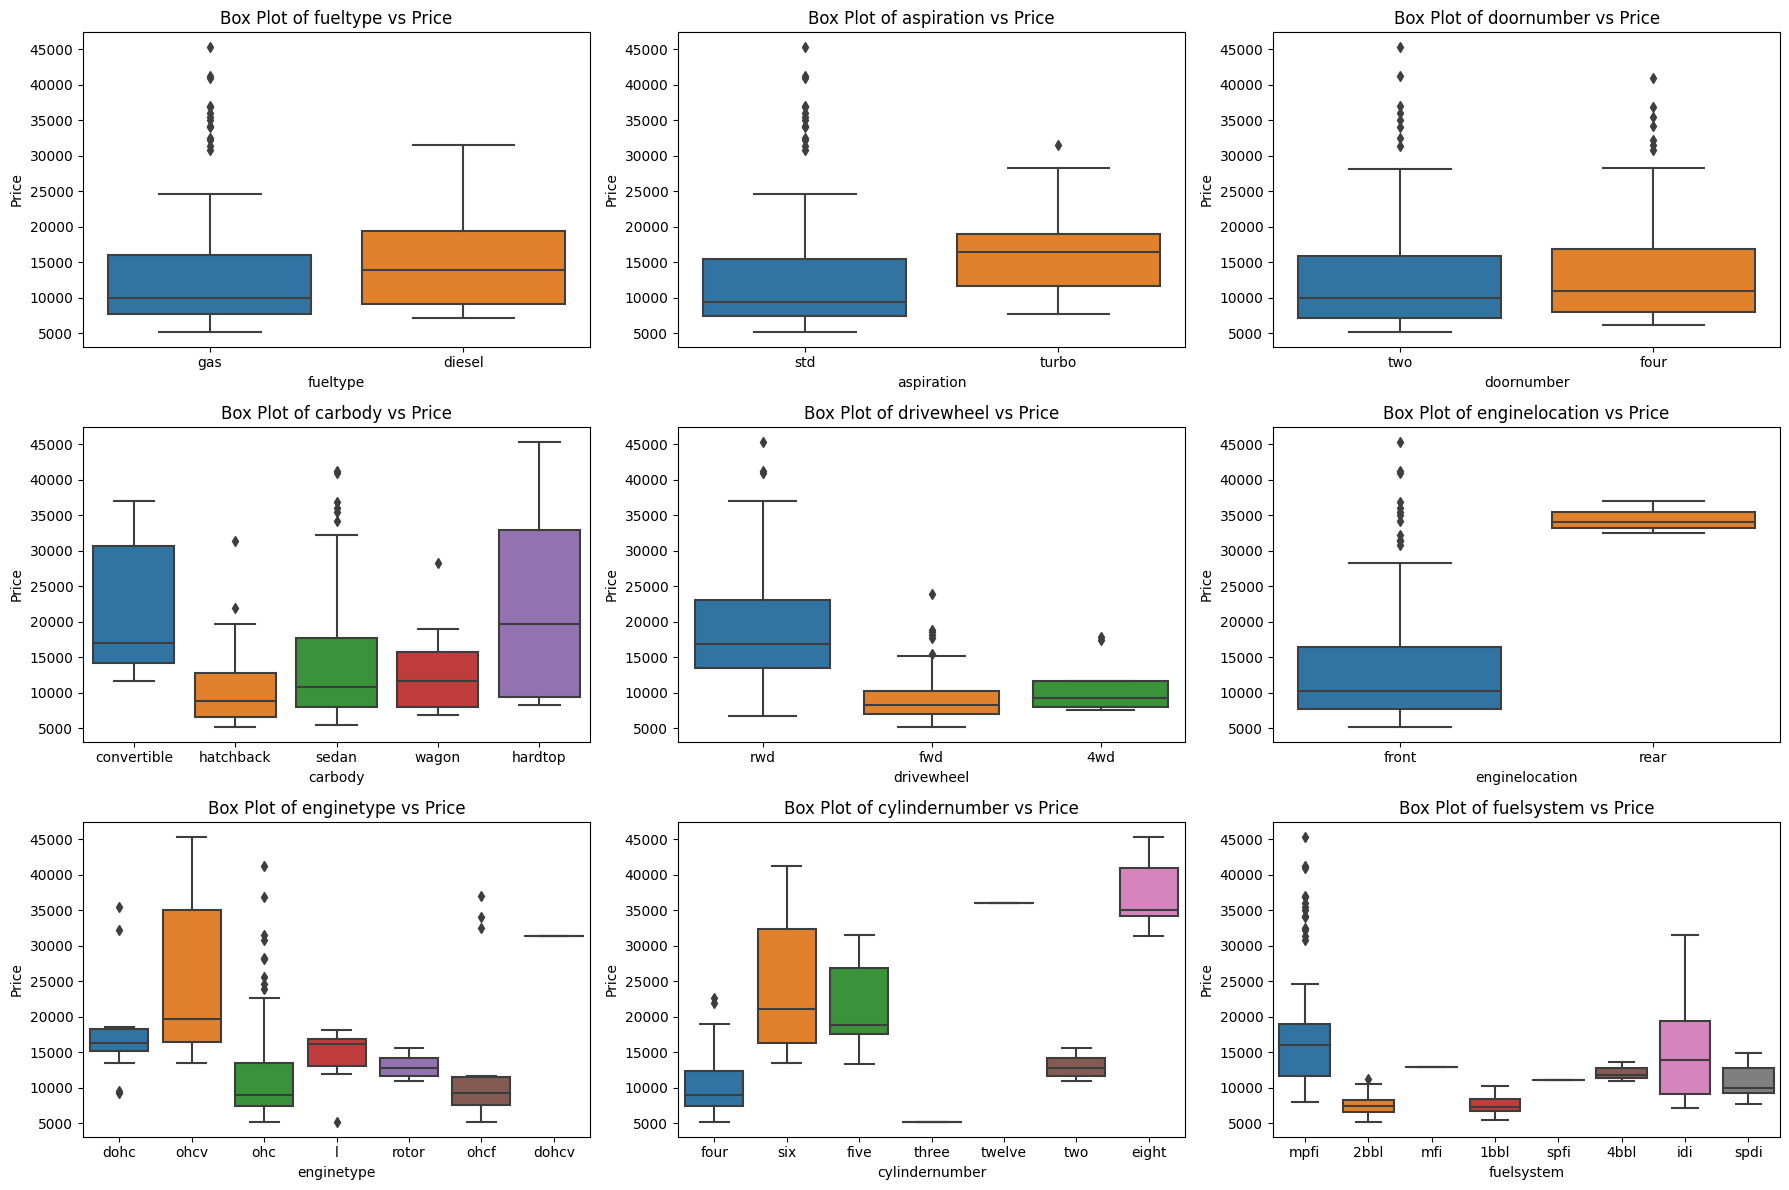

In [15]:
import matplotlib.pyplot as plt

features = list(df_cat.columns)
features.remove("symboling")
features.remove("CarName")

fig, axes = plt.subplots(3, 3, figsize=(18, 12))

axes = axes.flatten()


for i, feature in enumerate(features):
    ax = axes[i]
    sns.boxplot(x=feature, y='price', data=data, ax=ax)
    ax.set_title(f'Box Plot of {feature} vs Price')
    ax.set_xlabel(feature)
    ax.set_ylabel('Price')

for i in range(len(features), 9):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


### <font style="color:red;">Conclusion from EDA</font>

- **Fuel Type:** Diesel is slightly more expensive than gas.

- **Aspiration:** Turbo cars tend to be more expensive.

- **Door Numbers:** Do not have a strong effect on price.

- **Car Body:** All types of car bodies are cheaper compared to convertible car bodies.

- **Drive Wheel:** Rear-wheel drive (RWD) is the most expensive drive wheel option.

- **Engine Location:** Cars with front engine location are significantly cheaper than cars with rear engine location.

- **Engine Type:** OHCV (Overhead Camshaft Valve) has the highest price.

- **Cylinder Number:** The number of cylinders affects the price proportionally.

These findings summarize the insights gained from the Exploratory Data Analysis (EDA) on the dataset.


## <span style="color:#FF5733;">Choosing the Important Features</span>

In [16]:
data = data[['price','enginetype','fueltype', 'aspiration','carbody',
             'cylindernumber', 'drivewheel','wheelbase','curbweight', 
             'enginesize', 'boreratio','horsepower', 'citympg','highwaympg', 'carlength','carwidth']]

## <span style="color:#FF5733;">Performing Feature Engineering</span>

In [17]:
'''
we will create priceCatagory with 3 classes :

-->Budget_Friendly
-->Medium Range
-->TopNotch Cars

'''
data.loc[ data['price'] <= 20000, 'priceCatagory'] = 0
data.loc[(data['price'] > 20000) & (data['price'] <= 40000), 'priceCatagory'] = 1
data.loc[ data['price'] > 40000, 'priceCatagory'] = 2
data["priceCatagory"]=data["priceCatagory"].astype(int)


## <span style="color:#FF5733;">Encoding the Catagorical Columns</span>

In [18]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

cat = ["enginetype", "fueltype", "aspiration", "carbody", "cylindernumber", "drivewheel"]


data[cat] = data[cat].apply(lambda col: LabelEncoder().fit_transform(col))

data.head()


,price,enginetype,fueltype,aspiration,carbody,cylindernumber,drivewheel,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,priceCatagory
0,13495.0,0,1,0,0,2,2,88.6,2548,130,3.47,111,21,27,168.8,64.1,0
1,16500.0,0,1,0,0,2,2,88.6,2548,130,3.47,111,21,27,168.8,64.1,0
2,16500.0,5,1,0,2,3,2,94.5,2823,152,2.68,154,19,26,171.2,65.5,0
3,13950.0,3,1,0,3,2,1,99.8,2337,109,3.19,102,24,30,176.6,66.2,0
4,17450.0,3,1,0,3,1,0,99.4,2824,136,3.19,115,18,22,176.6,66.4,0


## <span style="color:#FF5733;">Scaling the Features</span>

In [19]:
y = data["price"]
x= data.drop("price",axis=1)

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

## <span style="color:#FF5733;">Linear Regression</span>

In [20]:

# Create a Linear Regression model
model_lr = LinearRegression()

# Fit the Linear Regression model to the training data
model_lr.fit(X_train, y_train)

# Make predictions on the test data
preds = model_lr.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, preds)
print("R-squared score:", r2)


R-squared score: 0.9259253190000201


## <span style="color:#FF5733;">Ridge Regression</span>

In [21]:


# Create a Ridge regression model
model_r = Ridge(alpha=0.6)  

# Fit the Ridge model to the training data
model_r.fit(X_train, y_train)

# Make predictions on the test data
preds = model_r.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, preds)
print("R-squared score:", r2)


R-squared score: 0.9263294213587332


## <span style="color:#FF5733;">Lasso Regression</span>

In [22]:

# Create a Lasso regression model
model_l = Lasso(alpha=10)  

# Fit the Lasso model to the training data
model_l.fit(X_train, y_train)

# Make predictions on the test data
preds = model_l.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, preds)
print("R-squared score:", r2)


R-squared score: 0.9352835969070645


## <span style="color:#FF5733;">DecisionTreeRegressor</span>

In [23]:

# Create a Decision Tree regression model
model_d = DecisionTreeRegressor(random_state=42)  

# Fit the Decision Tree model to the training data
model_d.fit(X_train, y_train)

# Make predictions on the test data
preds = model_d.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, preds)
print("R-squared score:", r2)


R-squared score: 0.8854764736558561


## <span style="color:#FF5733;">RandomForestRegressor</span>

In [24]:

# Create a Random Forest regression model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)  

# Fit the Random Forest model to the training data
model_rf.fit(X_train, y_train)

# Make predictions on the test data
preds = model_rf.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, preds)
print("R-squared score:", r2)


R-squared score: 0.9503334419955479


## <span style="color:#FF5733;">KNeighborsRegressor</span>

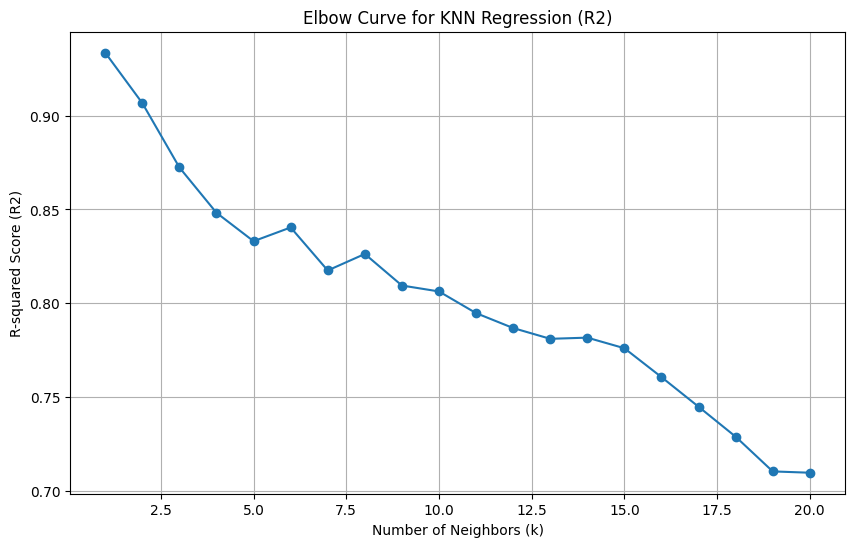

In [25]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
import numpy as np

# Create lists to store the k values and corresponding R-squared scores
k_values = []
r2_scores = []

# Define a range of k values to test
k_range = range(1, 21)  # You can adjust this range as needed

# Iterate through different k values
for k in k_range:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)
    k_values.append(k)
    r2_scores.append(r2)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, r2_scores, marker='o', linestyle='-')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('R-squared Score (R2)')
plt.title('Elbow Curve for KNN Regression (R2)')
plt.grid(True)
plt.show()


In [26]:

# Create a KNN regression model
model_k = KNeighborsRegressor(n_neighbors=1)  

# Fit the KNN model to the training data
model_k.fit(X_train, y_train)

# Make predictions on the test data
preds = model_k.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, preds)
print("R-squared score:", r2)


R-squared score: 0.9335329252264994


## <span style="color:#FF5733;">Choosing the final model as RandomForestRegressor </span>

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Create a Random Forest regression model
final_model = RandomForestRegressor(n_estimators=100, random_state=42)  

# Fit the Random Forest model to the training data
final_model.fit(X_train, y_train)

# Make predictions on the test data
fpreds = final_model.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, fpreds)
print("R-squared score:", r2)


R-squared score: 0.9503334419955479


## <span style="color:#FF5733;">Regression plot between actual and predicted values</span>


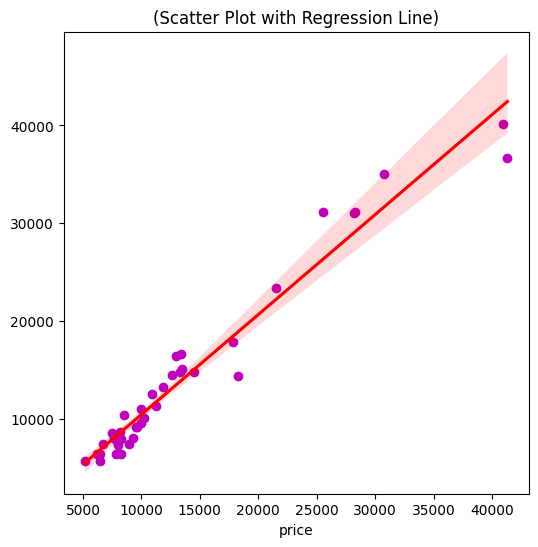

In [28]:
# Create a scatter plot of true vs. predicted values
plt.figure(figsize=(6,6))
plt.scatter(y_test, fpreds, color='m')

# Add a regression line using Seaborn's regplot
sns.regplot(x=y_test, y=fpreds,scatter=False, color='red')

plt.title('(Scatter Plot with Regression Line)')

# Show the plot
plt.show()

## <span style="color:#FF5733;">Plot between actual and predicted values</span>


In [29]:
def plot_dis(y_test, y_pred):
    plt.figure()
    sns.kdeplot(y_test, color="r", label="Actual Value")
    sns.kdeplot(y_pred, color="b", label="Pred Values")
    plt.legend()

    plt.title('Actual vs Pred Values')

    plt.show()

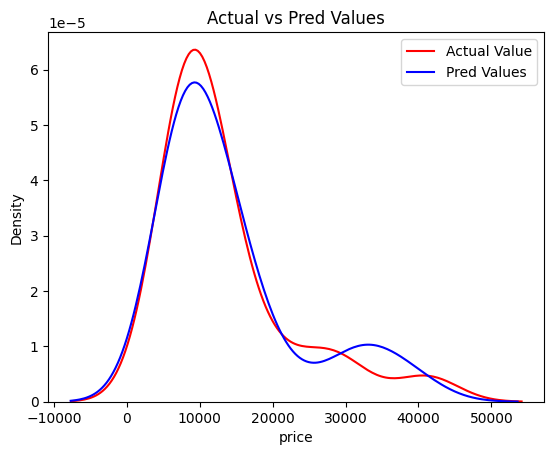

In [30]:
plot_dis(y_test, fpreds)


## <span style="color:black;">...............................Thank You !! .........................</span>
